<a href="https://colab.research.google.com/github/arjun372/NE795-SciML/blob/main/Homework%203/Homework_3_Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3 - Problem 1 - Dimensionality Reduction with PCA

## 1.1. Data visualization

In [1]:
## 2. Iris visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

## Data loading
iris = datasets.load_iris()

# Create a DataFrame with the features and the target
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Define the palette for the species
palette = {
    'setosa': '#ff9d00',
    'versicolor': '#00ffaa',
    'virginica': '#c020ff'
}

The code below loads the Iris dataset, creates a DataFrame, and then uses Seaborn's `pairplot` function to create a grid of scatter plots for each pair of features, with the data points colored by species. Additionally, Kernel Density Estimate (KDE) plots are overlaid on the off-diagonal subplots to show the density distribution of the data points.


The pair-plot shows the bivariate relationships between each pair of features and the distributions of each feature on the diagonal.

When observing the plots, we look for the following features:

1. **Separation between species**: If one species is clearly separated from the others in terms of one or more features, it indicates that those features are good at distinguishing between species.

2. **Feature distributions**: The KDE plots on the off-diagonal subplots show the distribution of each feature for each species. Sharp peaks suggest that a species has a strong preference for certain feature values, while wide distributions suggest more variability within that species.

3. **Correlations**: In the scatter plots, we look for linear or non-linear relationships between pairs of features. A strong correlation between two features might appear as a clear trend or pattern in the scatter plot.

4. **Outliers**: We look to identify any points that do not fit the general pattern of the data. These could be outliers or misclassified instances.

Some notable patterns in the data include:

1. `setosa` tends to be well-separated from `versicolor` and `virginica` in terms of `petal length` and `petal width`. It usually has smaller petal dimensions.
2. `versicolor` and `virginica` are more difficult to separate based on `sepal length` and `sepal width`, but they can be somewhat distinguished by `petal length` and `petal width`.
3. There are correlations between `petal length` and `petal width`, and possibly between `sepal length` and `sepal width`.

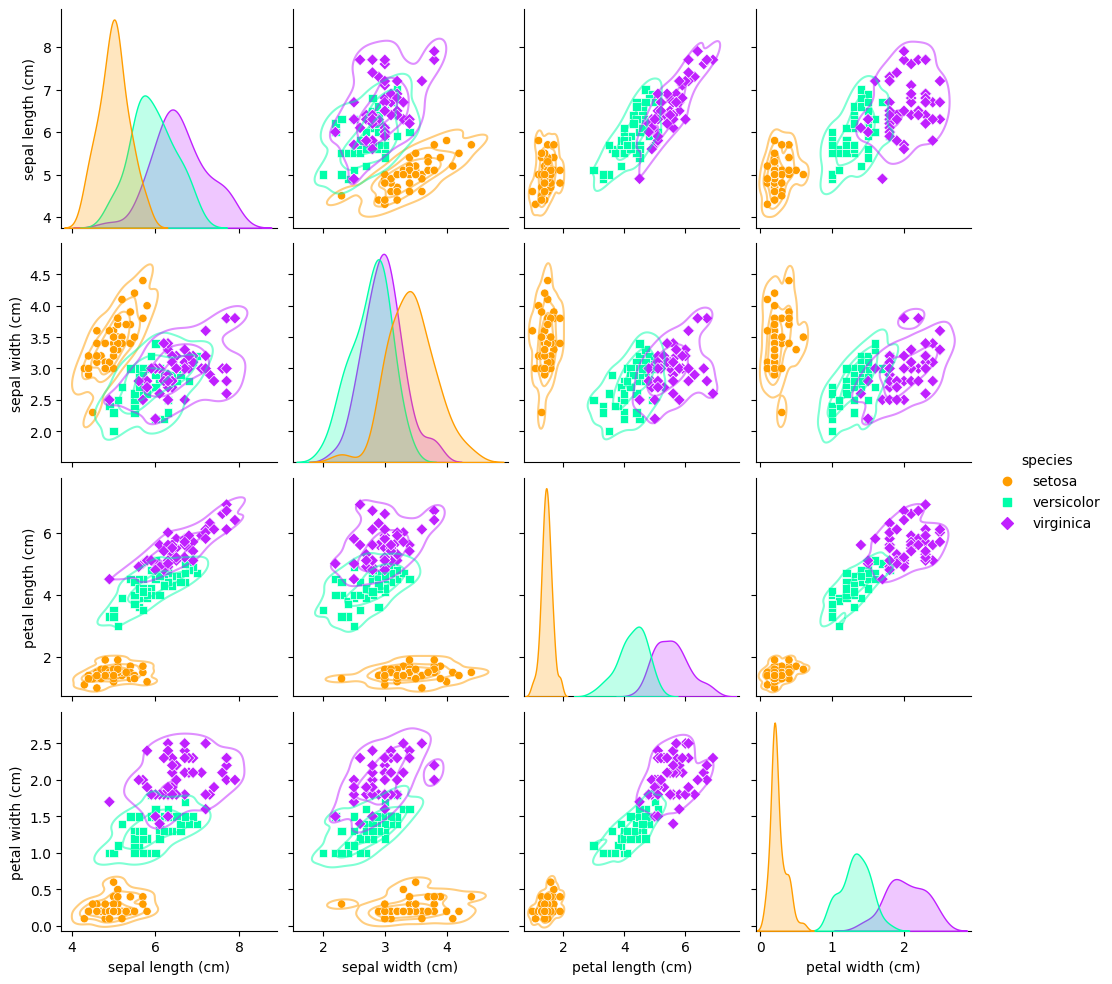

In [2]:
# Pairplot
g = sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"], palette=palette)
# Overlay KDE plots on the off-diagonal subplots
g.map_offdiag(sns.kdeplot, levels=4, alpha=0.5)

# Show the plot
plt.show()

## 1.2. PCA Function Attributes

Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms the original variables into a new set of variables called principal components (PCs). These components are orthogonal to each other and capture the maximum variance in the data. The `PCA` function from the `sklearn.decomposition` module in Python can be used to perform PCA on a dataset.

The PCA function in `sklearn.decomposition.PCA` has several attributes that provide information about the results of the PCA transformation. Here is a list of the attributes available after fitting the PCA model to the data:

1. **components_**: The principal components as an array where each row corresponds to a component, and each column corresponds to the original features. The components are sorted by their explained variance.

2. **explained_variance_**: The amount of variance explained by each of the selected components. It is equivalent to the eigenvalues of the covariance matrix of the data.

3. **explained_variance_ratio_**: The percentage of variance explained by each of the selected components. It is the explained variance normalized by the sum of all the variances.

4. **singular_values_**: These are the singular values corresponding to each of the selected components. The singular values are related to the eigenvalues of the covariance matrix of the data. Specifically, the explained variance is obtained by squaring the singular values and dividing by the number of observations.

5. **mean_**: The per-feature empirical mean, estimated from the training set, which is used for centering the data during the PCA transformation.

6. **n_components_**: The number of components that were selected during the fit. It is the same as the `n_components` parameter if it was set by the user, or the minimum of the number of features or samples if `n_components` was not set.

7. **n_features_**: The number of features in the fitted data.

8. **n_samples_**: The number of samples in the fitted data.

9. **noise_variance_**: The estimated noise covariance following the Probabilistic PCA model. It is not available when setting `svd_solver='arpack'`.


In [3]:
from sklearn.decomposition import PCA

# Standardize the features before applying PCA
from sklearn.preprocessing import StandardScaler
X = iris.data
X_standardized = StandardScaler().fit_transform(X)

# Initialize PCA and fit it to the standardized data
pca = PCA()
pca.fit(X_standardized)

# Principal Components (PCs)
PCs = pca.components_
print("Principal Components (PCs):")
print(PCs)

# PC scores (also known as transformed or projected data)
PC_scores = pca.transform(X_standardized)
print("PC scores (first few rows):")
print(PC_scores[:5])

# Explained variances (eigenvalues)
variances = pca.explained_variance_
print("Variances (eigenvalues) of each PC:")
print(variances)

# Variance ratios (proportion of variance explained by each PC)
variance_ratios = pca.explained_variance_ratio_
print("Variance ratios of each PC:")
print(variance_ratios)

# Cumulative variance ratios
cumulative_variance_ratios = pca.explained_variance_ratio_.cumsum()
print("Cumulative variance ratios:")
print(cumulative_variance_ratios)

Principal Components (PCs):
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]
PC scores (first few rows):
[[-2.26470281  0.4800266  -0.12770602 -0.0241682 ]
 [-2.08096115 -0.67413356 -0.23460885 -0.10300677]
 [-2.36422905 -0.34190802  0.04420148 -0.02837705]
 [-2.29938422 -0.59739451  0.09129011  0.06595556]
 [-2.38984217  0.64683538  0.0157382   0.03592281]]
Variances (eigenvalues) of each PC:
[2.93808505 0.9201649  0.14774182 0.02085386]
Variance ratios of each PC:
[0.72962445 0.22850762 0.03668922 0.00517871]
Cumulative variance ratios:
[0.72962445 0.95813207 0.99482129 1.        ]


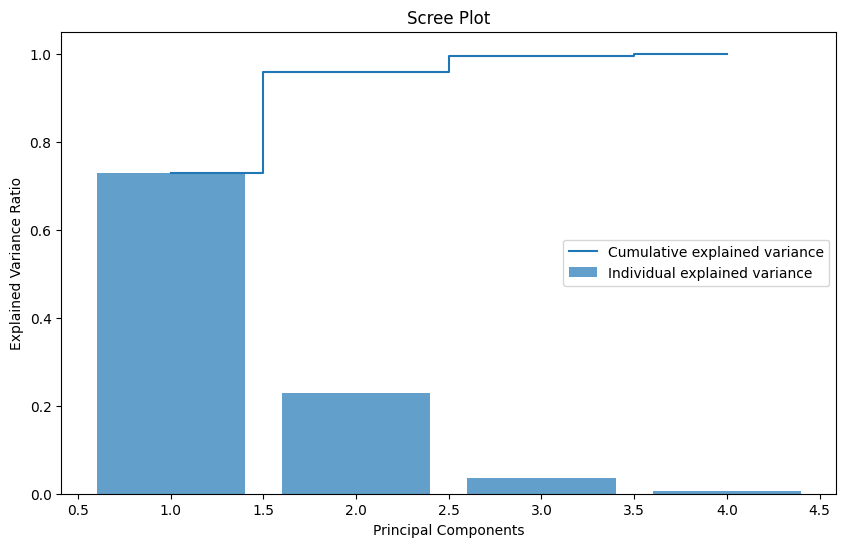

In [4]:
import numpy as np

# Number of components
num_components = len(variance_ratios)

# Create an array with the indices of the components
components = np.arange(num_components) + 1

# Create the scree plot
plt.figure(figsize=(10, 6))
plt.bar(components, variance_ratios, alpha=0.7, align='center', label='Individual explained variance')
plt.step(components, np.cumsum(variance_ratios), where='mid', label='Cumulative explained variance')

# Add labels and title
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')

# Add a legend
plt.legend(loc='best')

# Show the plot
plt.show()

**Singular Values**: These can give you an idea of the importance of each principal component, similar to the explained variance ratio but on a different scale.

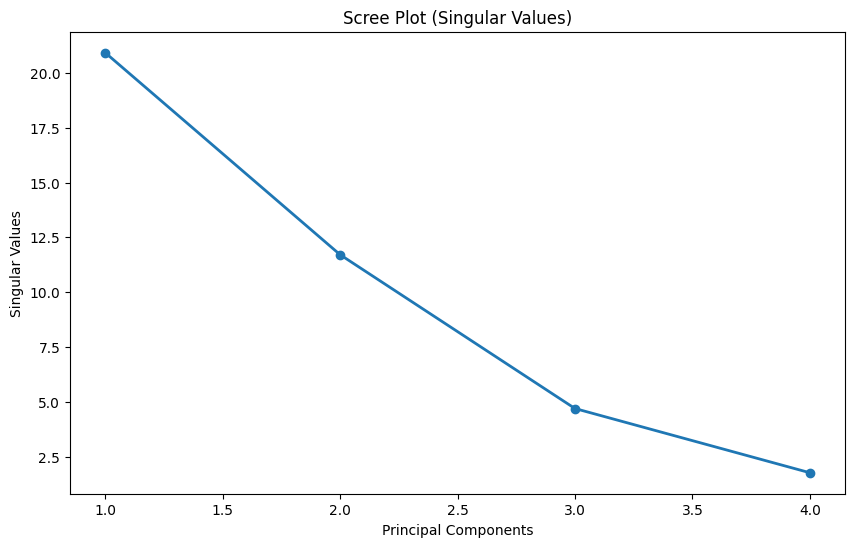

In [5]:
### Singular Values
singular_values = pca.singular_values_

plt.figure(figsize=(10, 6))
plt.plot(components, singular_values, 'o-', linewidth=2)
plt.title('Scree Plot (Singular Values)')
plt.xlabel('Principal Components')
plt.ylabel('Singular Values')
plt.show()

**Loadings**: The principal component loadings, which are the coefficients of the original variables in the principal components, can be plotted to understand how each original feature contributes to the principal components.

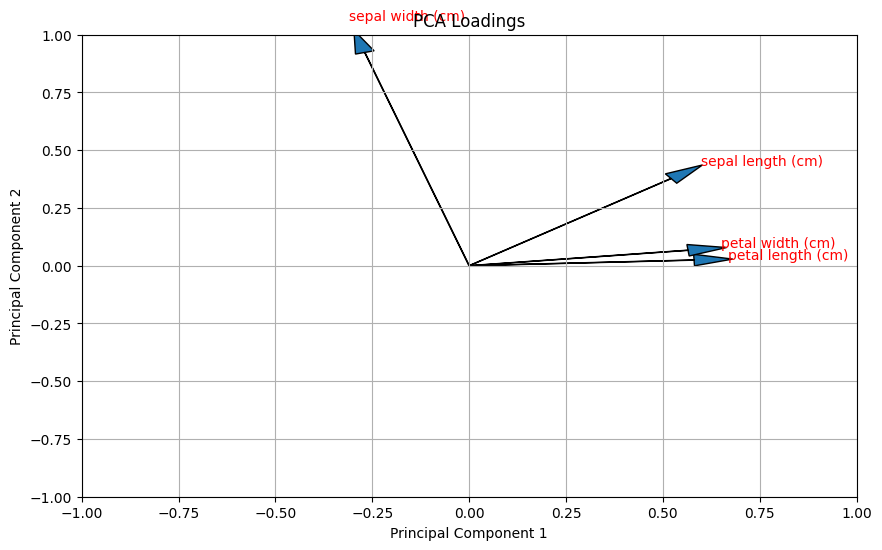

In [6]:
loadings = pca.components_.T

# Plot the loadings for the first two principal components
plt.figure(figsize=(10, 6))
for i, feature in enumerate(iris.feature_names):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], head_width=0.05, head_length=0.1)
    plt.text(loadings[i, 0]*1.15, loadings[i, 1]*1.15, feature, color='r')

plt.title('PCA Loadings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

**Cumulative Explained Variance**: This is the cumulative sum of the explained variance ratios and can be plotted to determine how many components are needed to explain a certain percentage of the variance.

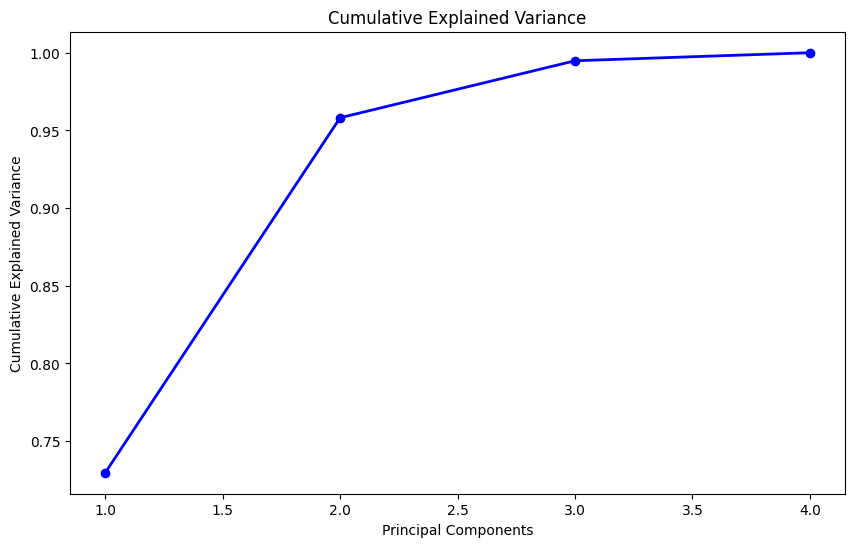

In [7]:
### Cumulative Explained Variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(components, cumulative_variance, 'o-', linewidth=2, color='blue')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

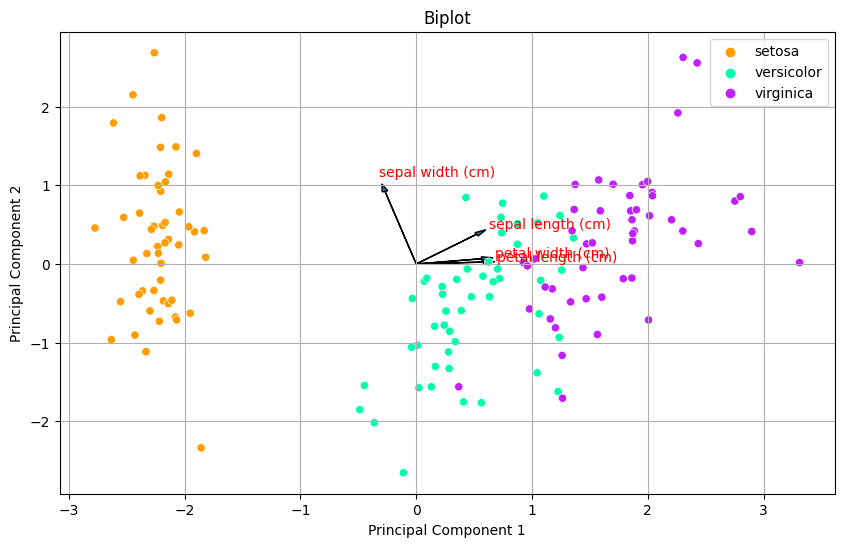

In [8]:
### Biplot (for the first two principal components)
# Assuming X_pca2 and pca2 are already computed with n_components=2
# Initialize PCA with 2 components and fit it to the standardized data
pca2 = PCA(n_components=2)
pca2.fit(X_standardized)

# Transform the data to get the PC scores for the first two principal components
X_pca2 = pca2.transform(X_standardized)

plt.figure(figsize=(10, 6))
for i, feature in enumerate(iris.feature_names):
    plt.arrow(0, 0, pca2.components_[0, i], pca2.components_[1, i], head_width=0.05, head_length=0.1)
    plt.text(pca2.components_[0, i]*1.2, pca2.components_[1, i]*1.2, feature, color='r')

sns.scatterplot(x=X_pca2[:, 0], y=X_pca2[:, 1], hue=iris.target_names[iris.target], palette=palette)

plt.title('Biplot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

## 1.3. Dimensionality Reduction to N=2 Components

To visualize the transformed data using a 2-D plot after reducing the dimensionality to two components with PCA, we perform the following steps.

1. Perform PCA on the standardized data specifying `n_components=2`.
2. Transform the data to get the PC scores for the first two principal components.
3. Create a scatter plot of the two principal components, coloring the points by their species to see if the PCA has separated the classes well.

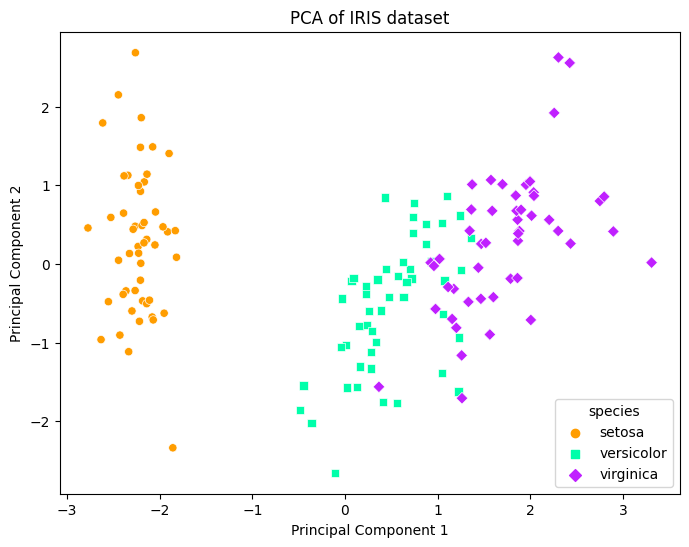

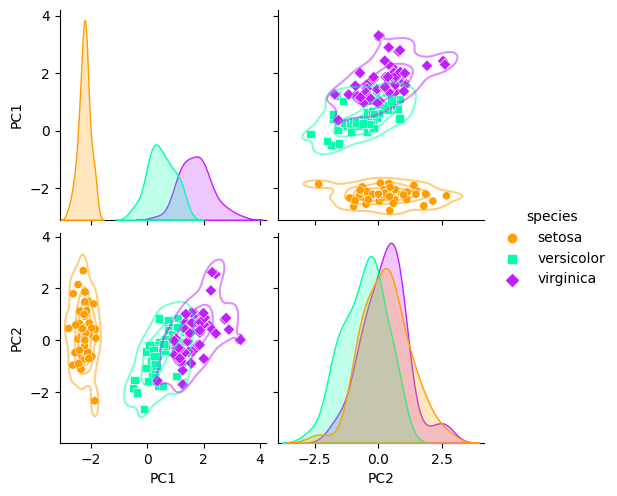

In [9]:
# Standardize the features before applying PCA
X = iris.data
y = iris.target
X_standardized = StandardScaler().fit_transform(X)

# Initialize PCA with 2 components and fit it to the standardized data
pca2 = PCA(n_components=2)
pca2.fit(X_standardized)

# Transform the data to get the PC scores for the first two principal components
X_pca2 = pca2.transform(X_standardized)

# Create a DataFrame with the PC scores and the species
pca2_df = pd.DataFrame(data=X_pca2, columns=['PC1', 'PC2'])
pca2_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Plot the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca2_df, hue='species', palette=palette, style='species', markers=["o", "s", "D"])

# Set the title and labels of the plot
plt.title('PCA of IRIS dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# Show the plot
plt.show()

g = sns.pairplot(pca2_df, hue='species', markers=["o", "s", "D"], palette=palette)
# Overlay KDE plots on the off-diagonal subplots
g.map_offdiag(sns.kdeplot, levels=4, alpha=0.5)
# Show the plot
plt.show()

## 1.4. Dimensionality Reduction to N=3 Components

To visualize the transformed data using a 3-D plot after reducing the dimensionality to three components with PCA, we perform the following steps.


1. Perform PCA on the standardized data specifying `n_components=3`.
2. Transform the data to get the PC scores for the first three principal components.
3. Create a 3-D scatter plot of the three principal components, optionally coloring the points by their species to see if the PCA has separated the classes well.

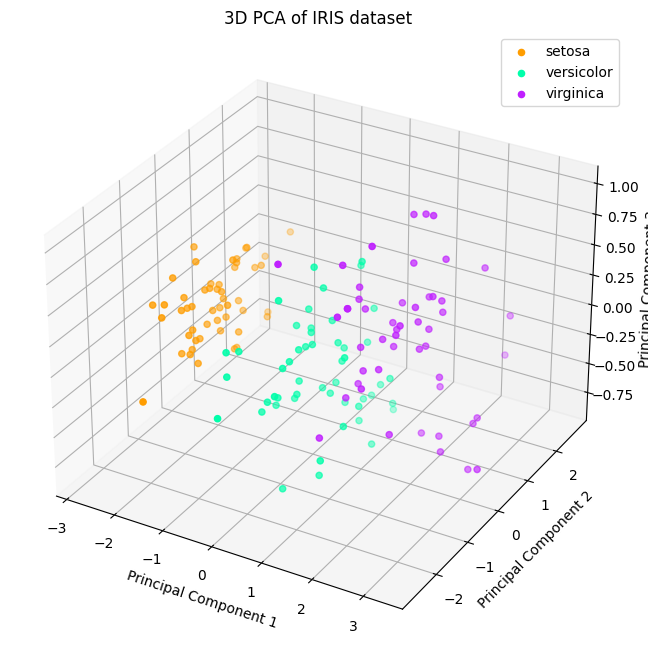

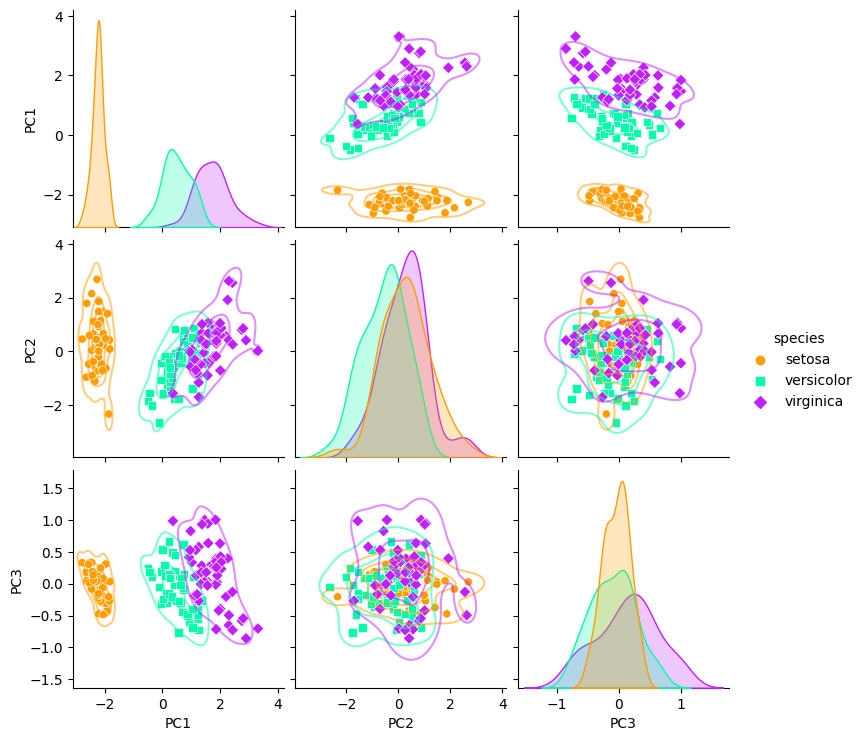

In [10]:
from mpl_toolkits.mplot3d import Axes3D

# Initialize PCA with 3 components and fit it to the standardized data
pca3 = PCA(n_components=3)
X_pca = pca3.fit_transform(X_standardized)

# Create a DataFrame with the PC scores and the species
pca3_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
pca3_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Plot the first three principal components in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each species
for species, color in palette.items():
    indices = pca3_df['species'] == species
    ax.scatter(pca3_df.loc[indices, 'PC1'], pca3_df.loc[indices, 'PC2'], pca3_df.loc[indices, 'PC3'], c=color, label=species)

# Set the title and labels of the plot
ax.set_title('3D PCA of IRIS dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Legend
ax.legend()

g = sns.pairplot(pca3_df, hue='species', markers=["o", "s", "D"], palette=palette)
# Overlay KDE plots on the off-diagonal subplots
g.map_offdiag(sns.kdeplot, levels=4, alpha=0.5)

# Show the plot
plt.show()